<a href="https://colab.research.google.com/github/Murcha1990/Raiffaizen_ML_summer2023/blob/main/%D0%97%D0%B0%D0%BD%D1%8F%D1%82%D0%B8%D0%B5_12_features/tsne.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Визуализация данных при помощи t-SNE

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.manifold import TSNE

RANDOM_STATE = 42

Загрузим данные

In [ ]:
from sklearn.datasets import load_digits

digits = load_digits()

pixel_data = digits.data
target = digits.target

pixel_data.shape

(1797, 64)

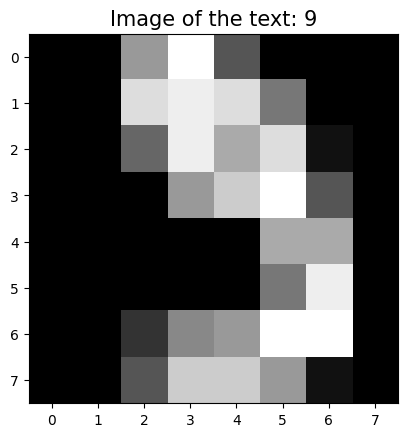

In [ ]:
single_image = pixel_data[105, :].reshape(8,8)

plt.imshow(single_image, cmap='gray')
plt.title(f"Image of the text: {target[105]}", fontsize=15)
plt.show()

Будем делать визуализацию на плоскости (n_components = 2)

In [ ]:
tsne = TSNE(n_components=2, random_state=RANDOM_STATE)

x_transformed = tsne.fit_transform(pixel_data)

In [ ]:
tsne_df = pd.DataFrame(np.column_stack((x_transformed, target)), columns=['X', 'Y', "Targets"])

tsne_df.loc[:, "Targets"] = tsne_df.Targets.astype(int)

<ipython-input-8-fc5b1d408068>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  tsne_df.loc[:, "Targets"] = tsne_df.Targets.astype(int)


In [ ]:
tsne_df.head(10)

,X,Y,Targets
0,-3.037146,54.765907,0
1,10.420932,-11.469612,1
2,-13.423026,-18.973404,2
3,-36.020000,6.196481,3
4,40.863430,-7.114846,4
5,-26.992794,14.798592,5
6,34.975590,14.470626,6
7,2.421574,-42.542603,7
8,-14.447439,-5.932455,8
9,-19.861231,14.918030,9


Нарисуем результат

<Figure size 1000x800 with 0 Axes>

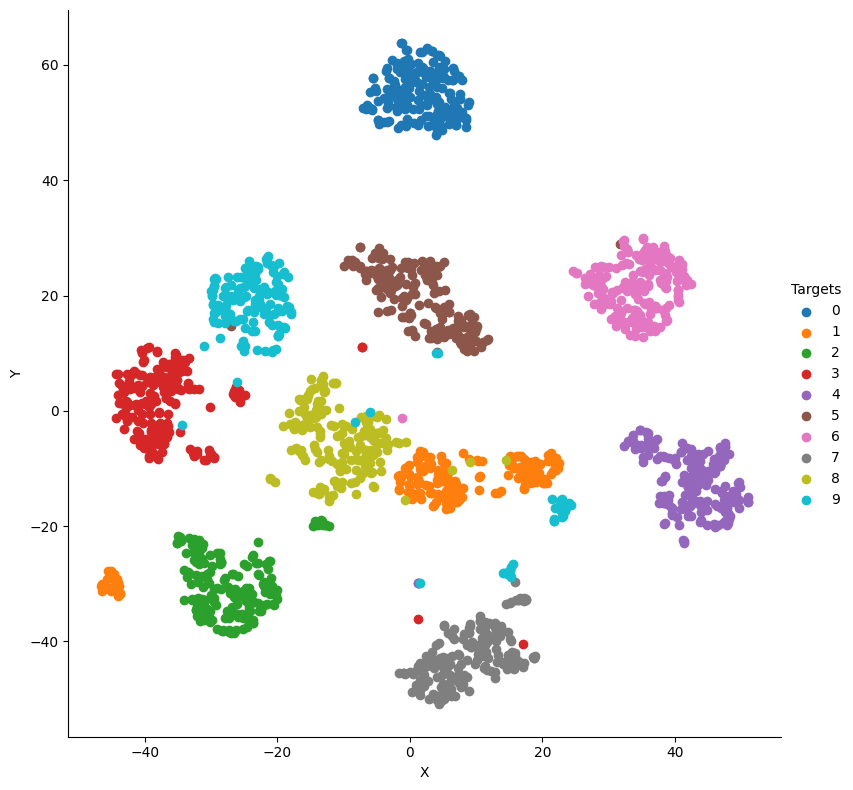

In [ ]:
plt.figure(figsize=(10,8))

g = sns.FacetGrid(data=tsne_df, hue='Targets', height=8)

g.map(plt.scatter, 'X', 'Y').add_legend()

plt.show()